(891, 12)


/var/folders/8t/3h6gkvdd2mq332js8_jknb8m0000gn/T/ipykernel_5730/2886572352.py:42: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].median(),inplace=True)
/var/folders/8t/3h6gkvdd2mq332js8_jknb8m0000gn/T/ipykernel_5730/2886572352.py:51: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values alw

0       C85
1       C85
2      C123
3      C123
4       E46
       ... 
886     B42
887     B42
888    C148
889    C148
890    C148
Name: Cabin, Length: 891, dtype: object

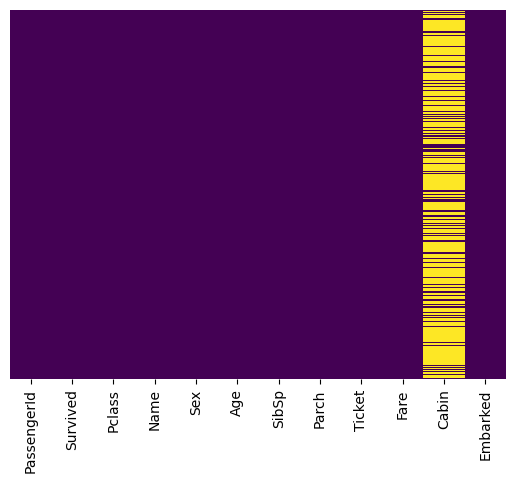

In [88]:
#Importation des librairies Python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#Importation du fichier tain.csv de la BDD Titanic
df = pd.read_csv('train.csv')

#La fonction isnull retourne s'il y a des valeurs manquantes 
df.isnull()

#Combien de valeurs manquantes avons-nous ? 
#Résultat : 177 valeurs manquantes sur Age, 687 sur Cabin et 2 sur Embarked  
df.isnull().sum()

#Autre moyen avec dataviz seaborn de voir les valeurs manquantes
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')

#On cherche a se deebarrasser de ses erreurs 
#voir la taille de le BDD, on a 891 lignes et 12 colonnes
df.shape

#Supprimer toutes les lignes qui contiennent les valeurs manquantes
#Afficher la nouvelle taille de la BDD après suppression, on a maintenant 183 lignes et 12 colonnes
df.dropna(how='any').shape

# Ici la suppression est temporaire, n'impacte pas la BDD parce qu'on n'a pas rajouter : `inplace = true`
#df.dropna(how='any', inplace = true).shape ,celui-ci supprime dans la BDD directement

#Technique interdite pour les big Data, car on vient de perdre plus de la moitié des lignes dans la BDD
#À n'utiliser que seulement si c'est 2 valeurs manquantes par exemple


#Voici ce que l'on peut faire pour les big Data
#On peut deja supprimer les valeurs manquantes d'une seule colonne comme Age
print(df.shape) #la taille normale
df.dropna(subset=['Age'],how='any').shape  #On a maintenant 714 lignes au lieu de 891 et 12 lignes 

#On peut remplacer les valeurs manquantes par la valeur médiane ou la moyenne
df['Age'].median() #la median donnant 28, ou la moyenne : mean
df['Age'].fillna(df['Age'].median(),inplace=True)
df.head(10) #on affiche
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis') #on visionnne

#On vient de remplacer les valeurs manquantes numériques de la colonne Age
#Passons aux valeurs catégoriques de la colonne `Cabin`
df['Cabin'].value_counts() #L`occurence est trop different, on ne pas remplacé par une valeur mediane

#Remplacer les valeurs manquantes de la colonne Cabin
df['Cabin'].fillna(value ='No cabin number',inplace=True)
df['Cabin'].value_counts() #On obtient 687 no cabin nnumber, ce qui est enorme donc ce nèst pas la bonne méthode

#Voici ce que l'on peut faire
#On Importe à nouveau le fichier tain.csv de la BDD Titanic et on cree une variable df2 cette fois-ci
df2 = pd.read_csv('train.csv')

#On fait en sorte que la ligne en-dessous attribue sa categoerie de cabin à la ligne manquante du dessus : bfill 
df2['Cabin'].fillna(method ='bfill',inplace=True)
df2['Cabin']

#On fait en sorte cette fois-ci que la ligne au-dessous attribue sa categoerie de cabin à la ligne manquante du dessous : ffill
df2['Cabin'].fillna(method ='ffill',inplace=True)
df2['Cabin']